# Ellipsometer Basics

**Scott Prahl**

*April 2020*

This notebook reviews the basic equations used in ellipsometry.  It also demonstrates how the Fresnel reflection equations are related to the ellipsometry parameter $\rho = \tan\psi \cdot e^{j\Delta}$.

References

* Archer, *Manual on Ellipsometry* 1968.
* Azzam, *Ellipsometry and Polarized Light*, 1977.
* Fujiwara, *Spectroscopic Ellipsometry*, 2007.
* Tompkins, *A User's Guide to Ellipsometry*, 1993
* Tompkins, *Handbook of Ellipsometry*, 2005.
* Woollam, *A short course in ellipsometry*, 2001.

In [1]:
import sympy
import numpy as np
import matplotlib.pyplot as plt

import pypolar.fresnel as fresnel
import pypolar.ellipsometry as ellipse

sympy.init_printing(use_unicode=True)

## Ellipsometry

### Layout
A basic ellipsometer configuration is shown below where the lights hits the sample at an angle $\theta$ from a normal to the surface.  The  incident electric field $E_{ip}$ is parallel to the plane-of-incidence (which contains the incoming vector and the vector normal to the surface).  The electric field $E_{is}$ is perpendicular to the plane of incidence

<img src="http://omlc.org/~prahl/host/453/week5/ellipsometry.png" width="100%">

Usually, the incident light $\mathbf{E}_i$ is linearly polarized but does not need to be.  The reflected light $\mathbf{E}_r$ is, in general, elliptically polarized. 

$$
\mathbf{E}_i = 
\begin{bmatrix}
E_{ip}e^{j\delta_{ip}}\\
E_{is}e^{j\delta_{is}}\\
\end{bmatrix}
\qquad\mbox{and}\qquad
\mathbf{E}_r = 
\begin{bmatrix}
E_{rp}e^{j\delta_{rp}}\\
E_{rs}e^{j\delta_{rs}}\\
\end{bmatrix}
$$

### $\Delta$ and $\tan\psi$

The effect of reflection is characterized by the angle $\Delta$, defined as the change in phase, and the angle $\psi$, the arctangent of the factor by which the amplitude ratio changes. 

$$
\Delta = (\delta_{rp} - \delta_{rs}) - (\delta_{ip}-\delta_{is})
$$

and

$$
\tan\psi = \frac{E_{is}}{E_{ip}} \cdot \frac{E_{rp}}{E_{rs}}
$$

In the special (but common case) of a smooth surface, there will be no mixing of parallel and perpendicular light, i.e.,

$$
\begin{bmatrix}
E_{rp}e^{j\delta_{rp}}\\
E_{rs}e^{j\delta_{rs}}
\end{bmatrix}
= 
\begin{bmatrix}
r_p & 0 \\
0 & r_s
\end{bmatrix}
\begin{bmatrix}
E_{ip}e^{j\delta_{ip}}\\
E_{is}e^{j\delta_{is}}
\end{bmatrix}
=
\begin{bmatrix}
r_p E_{ip}e^{j\delta_{ip}}\\
s_s E_{is}e^{j\delta_{is}}
\end{bmatrix}
$$

the $\tan\psi$ equation simplifies to

$$
\tan\psi = \frac{r_p}{r_s} 
$$

These overall change in field is often written as a single complex number $\rho$

$$
\rho = \tan\psi e^{j\Delta}
$$

Ellipsometry is the science of measuring and interpreting $\Delta$ and $\psi$ for a surface. A simple use of ellipsometry is to determine the complex index of refraction $m$ for a thick uniform flat substrate.  More elaborate ellisometric techniques allow one to determine one or more coatings on the substrate. 

### Refractive index

When light reflects off a surface, the amplitude and phase of the electric changes.  These changes depend on the wavelength $\lambda$ of the light, the angle of incidence $\theta$, the complex refractive index of the material $m= n(1-j \kappa)$, and the polarization state of the incident beam:

* The plane of incidence contains the incident electric field propagation vector and the normal to the surface.

* The angle of incidence is the angle beween these two directions

* The real part of the refractive index $n$ determines the speed of light in the material

* The imaginary part of the refractive index $\kappa$ determines the light absorption of the material

* Linearly polarized light parallel to the plane of incidence is **p-polarized**. 

* Linearly polarized light perpendicular to the plane of incident is **s-polarized**. 

* The phase shift and amplitude change is different for p and s- polarized light.

* For dielectrics like glass, the amount of reflected light is determined by a single number, the index of refraction $n$.  

* Semi-conductors and metals have a complex index of refraction  $m = n(1 - j \kappa)$.  



### Fresnel Reflection

The Fresnel formulas for light incident from a vacuum onto a flat surface at an angle $\theta$ from the normal with refractive index $m$ varies with the orientation of the electric field.  The plane of incidence is defined as containing both the incident direction and the normal to the surface.  If the incident field is parallel to the plane of incidence then
$$
r_p=r_\parallel ={m^2\cos\theta-\sqrt{m^2-\sin^2\theta}\over
                        m^2\cos\theta+\sqrt{m^2-\sin^2\theta}}
$$
If the incident field is perpendicular to the plane of incidence then
$$
r_s=r_\perp ={\cos\theta-\sqrt{m^2-\sin^2\theta}\over
                    \cos\theta+\sqrt{m^2-\sin^2\theta}}
$$

### Fundamental Equation of Ellipsometry

Ellipsometers are used to determine the parameters $\psi$ and $\Delta$ which can be used to calculate $\rho$
$$
\rho = {r_p(\theta)\over r_s(\theta)} = \tan\psi \cdot e^{j \Delta}
$$

The graph below shows how $\psi$ and $\Delta$ vary with the incidence angle

### Determining the complex index of refraction

A convenient formula for an isotropic, uniform sample is given in 
[Measurement of the Thickness and Refractive Index of Very Thin Films and the Optical Properties of Surfaces by Ellipsometry](https://archive.org/details/jresv67An4p363) so that when $\rho$ and $\theta$ are known, the complex index of refraction can be calculated.
$$
m = \tan\theta \sqrt{1-{4\rho\sin^2\theta\over (1+\rho)^2}}
$$

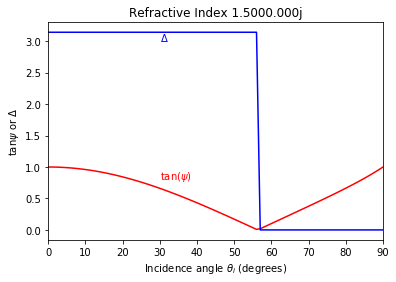

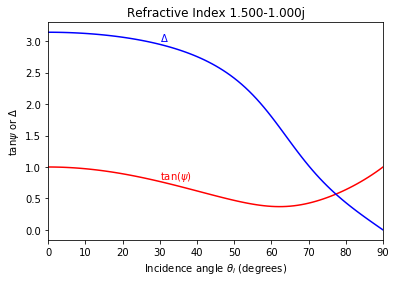

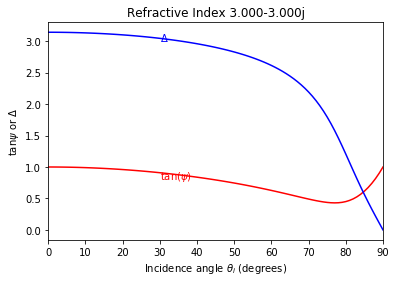

In [7]:
def plot_rho(m):
    angles = np.linspace(0.001,90,91)
    rho = fresnel.ellipsometry_rho(m,np.radians(angles))

    plt.plot(angles, np.abs(rho), color='red')
    plt.plot(angles, np.angle(rho),color='blue')

    plt.xlabel(r"Incidence angle $\theta_i$ (degrees)")
    plt.ylabel(r'$\tan\psi$ or $\Delta$')
    plt.title('Refractive Index %.3f%.3fj' % (m.real,m.imag))

    plt.xlim(0,90)
    plt.text(30, 3, r'$\Delta$', color='blue')
    plt.text(30, 0.8, 'tan($\psi$)', color='red')

m = 1.5
plot_rho(m)
plt.show()

m      = 1.5-1.0j
plot_rho(m)
plt.show()

m      = 3-3j
plot_rho(m)
plt.show()

Replicate figures 2.28 and 2.29 from Woollam's Short Course.

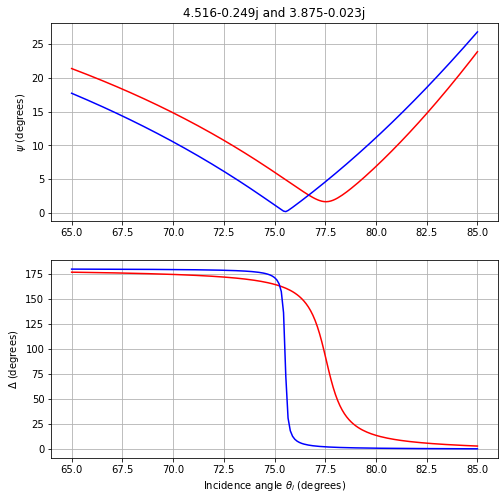

In [32]:
def plot_rho2(m1,m2):
    angles = np.linspace(65,85,181)
    rho1 = fresnel.ellipsometry_rho(m1,np.radians(angles))
    rho2 = fresnel.ellipsometry_rho(m2,np.radians(angles))

    psi1 = np.degrees(np.arctan(np.abs(rho1)))
    psi2 = np.degrees(np.arctan(np.abs(rho2)))

    Delta1 = np.degrees(np.angle(rho1))
    Delta2 = np.degrees(np.angle(rho2))


    plt.subplots(2,1,figsize=(8,8))
    plt.subplot(2,1,1)
    
    plt.plot(angles, psi1, color='red')
    plt.plot(angles, psi2,color='blue')
    plt.ylabel(r'$\psi$ (degrees)')
    plt.title('%.3f%+.3fj and %.3f%+.3fj' % (m1.real,m1.imag,m2.real,m2.imag))
    plt.grid(True)
    
    plt.subplot(2,1,2)
    plt.plot(angles, Delta1, color='red')
    plt.plot(angles, Delta2,color='blue')
    plt.xlabel(r"Incidence angle $\theta_i$ (degrees)")
    plt.ylabel(r'$\Delta$ (degrees)')
    plt.grid(True)



m1 = 4.516 - 0.249j  # amorphous silicon
m2 = 3.875 - 0.023j  # crystalline silicon
plot_rho2(m1,m2)
plt.show()

## Extracting Refractive Index from $\rho$

First we will calculate $\rho$ for a known complex index of refraction.  

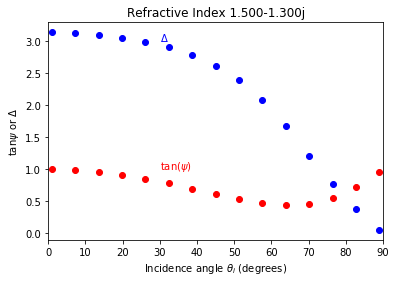

In [8]:
m = 1.5-1.3j
theta_i = np.linspace(1,89,15)
rho = fresnel.ellipsometry_rho(m,np.radians(theta_i))

plt.plot(theta_i, np.abs(rho), 'o', color='red')
plt.plot(theta_i, np.angle(rho), 'o', color='blue')

plt.xlabel(r"Incidence angle $\theta_i$ (degrees)")
plt.ylabel(r'$\tan\psi$ or $\Delta$')
plt.title('Refractive Index %.3f%.3fj' % (m.real,m.imag))

plt.xlim(0,90)
plt.text(30, 3, r'$\Delta$', color='blue')
plt.text(30, 1.0, 'tan($\psi$)', color='red')

plt.show()

Then, we will see if we can recover $m$ using $\rho$ and $\theta_i$.
We will test with incidence angles from 1° to 89°.  We avoid 0° and 90° because these angles are either impossible or do not contain sufficient information to invert.

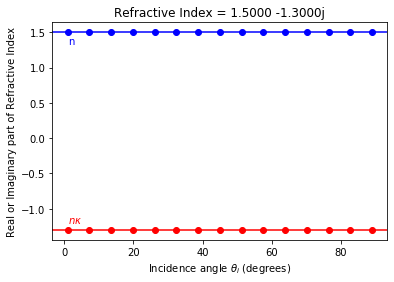

In [9]:
m = 1.5-1.3j
theta_i = np.linspace(1,89,15)
rho = fresnel.ellipsometry_rho(m,np.radians(theta_i))

m2 = ellipse.m_from_rho(rho, np.radians(theta_i))

plt.plot(theta_i, m2.real, 'o', color = 'blue')
plt.plot(theta_i, m2.imag, 'o', color='red')

plt.text(theta_i[0], m2[0].real-0.05, r'n', color='blue', va="top")
plt.text(theta_i[0], m2[0].imag+0.1, r'$n \kappa$', color='red')

plt.axhline(m.real,color='blue')
plt.axhline(m.imag,color='red')
plt.xlabel(r"Incidence angle $\theta_i$ (degrees)")
plt.ylabel('Real or Imaginary part of Refractive Index')
plt.title('Refractive Index = %.4f %.4fj'%(m.real,m.imag))

plt.show()

Quantitatively show that things work at an incidence angle of 70°

In [6]:
theta_i = 70
m = 1.5 - 2.0j
rho = fresnel.ellipsometry_rho(m,np.radians(theta_i))
print('Incidence angle  = %.1f°'%(theta_i))
print('rho              = %.3f%+.3fj'%(rho.real,rho.imag))
print('Refractive index = %.3f%+.3fj'%(m.real,m.imag))
print()
m2 = ellipse.m_from_rho(rho,np.radians(theta_i))         
print('Extracted index  = %.3f%+.3fj using rho'%(m2.real,m2.imag))

Incidence angle  = 70.0°
rho              = 0.006+0.541j
Refractive index = 1.500-2.000j

Extracted index  = 1.500-2.000j using rho
